In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from pandas.core.reshape.pivot import pivot
import matplotlib.dates as mdate
%matplotlib inline
import random
from datetime import datetime
import statsmodels.api as sm

In [2]:
#datset for plotting 
#df for model/prediction using tensorflow

In [3]:
dataset = pd.read_csv('com1.csv') #visualisation part
dataset.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,26-June-2020,1.76,1.78,1.76,1.78,1.775,16000,4,28400.0,16000,100.0,0.02,0.02
1,25-June-2020,1.77,1.77,1.70,1.70,1.735,8000,2,13880.0,8000,100.0,0.07,-0.07
2,24-June-2020,1.56,1.70,1.55,1.70,1.642,20000,5,32840.0,20000,100.0,0.15,0.14
3,22-June-2020,1.63,1.63,1.63,1.63,1.630,12000,3,19560.0,12000,100.0,0.00,0.00
4,19-June-2020,1.56,1.56,1.56,1.56,1.560,4000,1,6240.0,4000,100.0,0.00,0.00


In [4]:
dataset.describe()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.000000,30.000000
mean,1.656000,1.684000,1.652333,1.681667,1.668974,11066.666667,2.600000,18564.000000,11066.666667,100.0,0.031667,0.025667
std,0.124197,0.133173,0.121788,0.132225,0.123407,12145.478322,2.749295,20581.891874,12145.478322,0.0,0.058903,0.058527
min,1.420000,1.420000,1.420000,1.420000,1.420000,4000.000000,1.000000,5680.000000,4000.000000,100.0,0.000000,-0.070000
25%,1.560000,1.570000,1.560000,1.570000,1.570000,4000.000000,1.000000,6680.000000,4000.000000,100.0,0.000000,0.000000
50%,1.650000,1.710000,1.650000,1.700000,1.704583,4000.000000,1.000000,7300.000000,4000.000000,100.0,0.000000,0.000000
75%,1.750000,1.777500,1.750000,1.772500,1.750000,15000.000000,2.750000,22740.000000,15000.000000,100.0,0.017500,0.007500
max,1.900000,1.930000,1.900000,1.930000,1.900000,48000.000000,11.000000,82040.000000,48000.000000,100.0,0.160000,0.160000


In [5]:
from heatmap import heatmap, corrplot

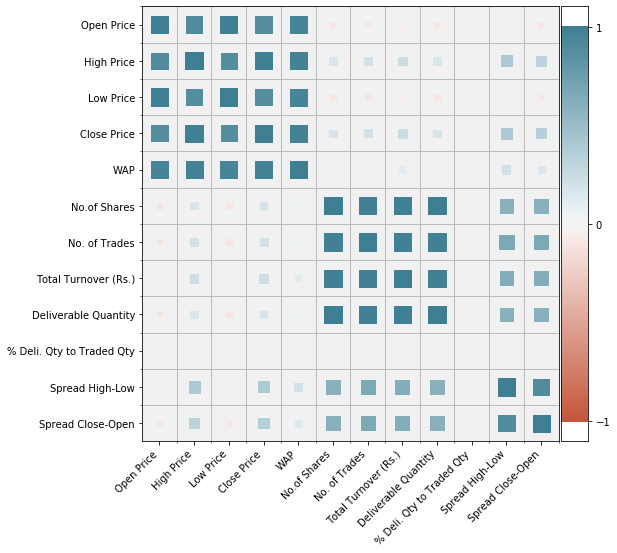

In [6]:
plt.figure(figsize=(8, 8)) #create a correlation matrix plot using all numerical columns from the dataset
corrplot(dataset.corr(), size_scale=300);

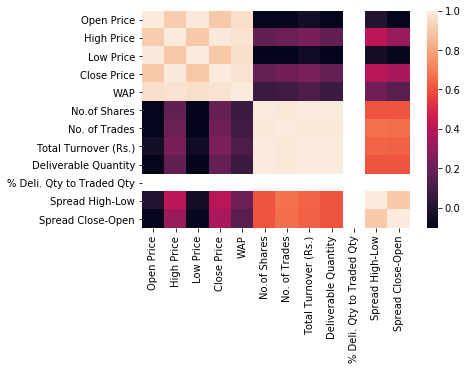

In [7]:
corr = dataset.corr() #heatmap plotting using seaborn
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [8]:
corr = dataset.corr() #plot with actual values
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/home/prathmesh/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/home/prathmesh/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/home/prathmesh/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Open Price,1.00,0.91,0.99,0.90,0.96,-0.09,-0.09,-0.04,-0.09,nan,-0.00,-0.09
High Price,0.91,1.00,0.90,1.00,0.97,0.18,0.20,0.23,0.18,nan,0.41,0.32
Low Price,0.99,0.90,1.00,0.90,0.96,-0.10,-0.10,-0.05,-0.10,nan,-0.04,-0.08
Close Price,0.90,1.00,0.90,1.00,0.97,0.18,0.21,0.24,0.18,nan,0.40,0.35
WAP,0.96,0.97,0.96,0.97,1.00,0.06,0.08,0.12,0.06,nan,0.21,0.15
No.of Shares,-0.09,0.18,-0.10,0.18,0.06,1.00,0.99,1.00,1.00,nan,0.61,0.61
No. of Trades,-0.09,0.20,-0.10,0.21,0.08,0.99,1.00,0.99,0.99,nan,0.67,0.66
Total Turnover (Rs.),-0.04,0.23,-0.05,0.24,0.12,1.00,0.99,1.00,1.00,nan,0.64,0.64
Deliverable Quantity,-0.09,0.18,-0.10,0.18,0.06,1.00,0.99,1.00,1.00,nan,0.61,0.61
% Deli. Qty to Traded Qty,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [9]:
close_price_corr = dataset.corr()['Close Price']
close_price_corr #specifc corelation with Closing Price

Open Price                   0.897668
High Price                   0.995388
Low Price                    0.896329
Close Price                  1.000000
WAP                          0.971250
No.of Shares                 0.181368
No. of Trades                0.206788
Total Turnover (Rs.)         0.240687
Deliverable Quantity         0.181368
% Deli. Qty to Traded Qty         NaN
Spread High-Low              0.397216
Spread Close-Open            0.354317
Name: Close Price, dtype: float64

In [11]:
dataset.set_index('Close Price',inplace=True)

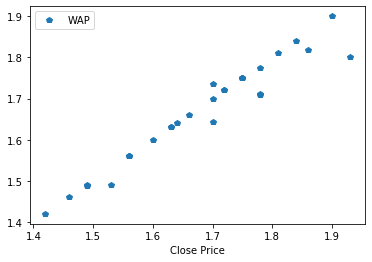

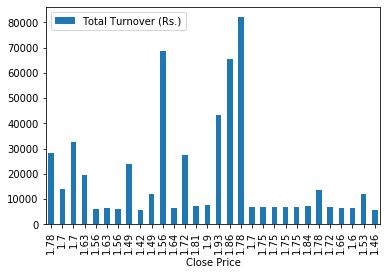

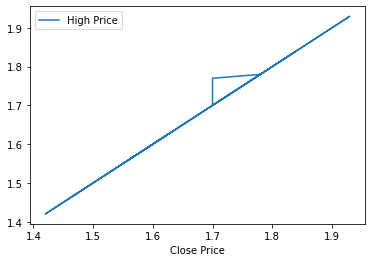

In [16]:
dataset.plot(y='WAP',style='p') #highly corelated
dataset.plot(y='Total Turnover (Rs.)',kind='bar') #very less corelated
dataset.plot(y='High Price') # corelation=1, so straight curve

In [13]:
df=pd.read_csv('FSSPL.BO.csv') #model prediction starts here #new large dataset for selected features 
df = df.dropna()

In [14]:
np.set_printoptions(suppress=True)

In [15]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-28,21.850000,22.50,21.850000,22.50,22.50,8000.0
1,2018-06-29,23.600000,23.60,23.600000,23.60,23.60,4000.0
2,2018-07-02,22.450001,22.85,22.450001,22.85,22.85,12000.0
3,2018-07-03,23.500000,23.50,21.750000,21.75,21.75,32000.0
4,2018-07-04,21.000000,21.00,21.000000,21.00,21.00,4000.0


In [14]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
482,2020-06-22,1.63,1.63,1.63,1.63,1.63,12000.0
483,2020-06-23,1.63,1.63,1.63,1.63,1.63,0.0
484,2020-06-24,1.56,1.70,1.55,1.70,1.70,20000.0
485,2020-06-25,1.77,1.77,1.70,1.70,1.70,8000.0
486,2020-06-26,1.76,1.78,1.76,1.78,1.78,16000.0


In [15]:
df1=df.reset_index()['Close']

In [16]:
df1

0      22.50
1      23.60
2      22.85
3      21.75
4      21.00
       ...  
481     1.63
482     1.63
483     1.70
484     1.70
485     1.78
Name: Close, Length: 486, dtype: float64

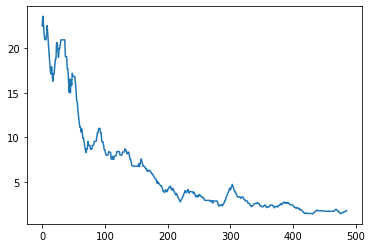

In [17]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
df1

array([[0.95045045],
       [1.        ],
       [0.96621622],
       [0.91666667],
       [0.88288288],
       [0.88063068],
       [0.88288288],
       [0.90540541],
       [0.95270266],
       [0.9031532 ],
       [0.85585586],
       [0.81081081],
       [0.76801806],
       [0.72747743],
       [0.70720721],
       [0.74549554],
       [0.70720721],
       [0.67117113],
       [0.70720721],
       [0.70720721],
       [0.74549554],
       [0.78378374],
       [0.78378374],
       [0.86711712],
       [0.86486486],
       [0.83558563],
       [0.79279279],
       [0.83558563],
       [0.83558563],
       [0.86036036],
       [0.88063068],
       [0.88063068],
       [0.88063068],
       [0.88063068],
       [0.88063068],
       [0.88063068],
       [0.88063068],
       [0.795045  ],
       [0.795045  ],
       [0.795045  ],
       [0.73423428],
       [0.73423428],
       [0.67792797],
       [0.61486486],
       [0.68243239],
       [0.61261261],
       [0.68018018],
       [0.650

In [20]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [21]:
training_size,test_size

(315, 171)

In [22]:
train_data

array([[0.95045045],
       [1.        ],
       [0.96621622],
       [0.91666667],
       [0.88288288],
       [0.88063068],
       [0.88288288],
       [0.90540541],
       [0.95270266],
       [0.9031532 ],
       [0.85585586],
       [0.81081081],
       [0.76801806],
       [0.72747743],
       [0.70720721],
       [0.74549554],
       [0.70720721],
       [0.67117113],
       [0.70720721],
       [0.70720721],
       [0.74549554],
       [0.78378374],
       [0.78378374],
       [0.86711712],
       [0.86486486],
       [0.83558563],
       [0.79279279],
       [0.83558563],
       [0.83558563],
       [0.86036036],
       [0.88063068],
       [0.88063068],
       [0.88063068],
       [0.88063068],
       [0.88063068],
       [0.88063068],
       [0.88063068],
       [0.795045  ],
       [0.795045  ],
       [0.795045  ],
       [0.73423428],
       [0.73423428],
       [0.67792797],
       [0.61486486],
       [0.68243239],
       [0.61261261],
       [0.68018018],
       [0.650

In [23]:

import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)



In [24]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [25]:
print(X_train.shape), print(y_train.shape)

(214, 100)
(214,)


(None, None)

In [26]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [27]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
4/4 [==============================] - 2s 568ms/step - loss: 0.0233 - val_loss: 0.0060
Epoch 2/100
4/4 [==============================] - 1s 169ms/step - loss: 0.0046 - val_loss: 0.0114
Epoch 3/100
4/4 [==============================] - 1s 169ms/step - loss: 0.0031 - val_loss: 0.0036
Epoch 4/100
4/4 [==============================] - 1s 169ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 5/100
4/4 [==============================] - 1s 167ms/step - loss: 0.0023 - val_loss: 0.0050
Epoch 6/100
4/4 [==============================] - 1s 168ms/step - loss: 0.0018 - val_loss: 0.0051
Epoch 7/100
4/4 [==============================] - 1s 173ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 8/100
4/4 [==============================] - 1s 168ms/step - loss: 0.0012 - val_loss: 8.2193e-04
Epoch 9/100
4/4 [==============================] - 1s 165ms/step - loss: 0.0011 - val_loss: 7.4495e-04
Epoch 10/100
4/4 [==============================] - 1s 166ms/step - loss: 7.4211e-04 - val_loss: 5.25

4/4 [==============================] - 1s 172ms/step - loss: 4.8922e-04 - val_loss: 2.3484e-04
Epoch 78/100
4/4 [==============================] - 1s 168ms/step - loss: 4.4005e-04 - val_loss: 2.4296e-04
Epoch 79/100
4/4 [==============================] - 1s 171ms/step - loss: 4.5852e-04 - val_loss: 2.7381e-04
Epoch 80/100
4/4 [==============================] - 1s 167ms/step - loss: 4.4435e-04 - val_loss: 2.5642e-04
Epoch 81/100
4/4 [==============================] - 1s 167ms/step - loss: 4.2226e-04 - val_loss: 2.3111e-04
Epoch 82/100
4/4 [==============================] - 1s 171ms/step - loss: 3.9911e-04 - val_loss: 3.2793e-04
Epoch 83/100
4/4 [==============================] - 1s 169ms/step - loss: 3.8159e-04 - val_loss: 2.3764e-04
Epoch 84/100
4/4 [==============================] - 1s 162ms/step - loss: 3.7861e-04 - val_loss: 2.8508e-04
Epoch 85/100
4/4 [==============================] - 1s 164ms/step - loss: 3.6699e-04 - val_loss: 2.3618e-04
Epoch 86/100
4/4 [=======================

In [32]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [33]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [34]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [35]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

5.151267410550865

In [36]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1.9719784129079077

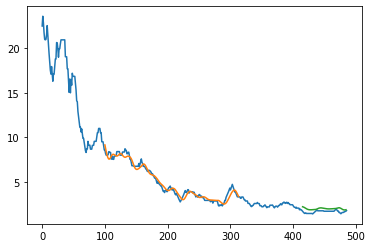

In [37]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
len(test_data)

171

In [39]:
x_input=test_data[71:].reshape(1,-1)
x_input.shape

(1, 100)

In [40]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [41]:
temp_input

[0.059009009009009,
 0.0536036036036036,
 0.0536036036036036,
 0.0581081081081081,
 0.05855855855855856,
 0.05270270270270269,
 0.057657657657657665,
 0.051801801801801786,
 0.051801801801801786,
 0.046396396396396394,
 0.046396396396396394,
 0.046396396396396394,
 0.046396396396396394,
 0.046396396396396394,
 0.04099099099099099,
 0.03603603603603604,
 0.033783783783783786,
 0.033783783783783786,
 0.02927927927927927,
 0.033783783783783786,
 0.02927927927927927,
 0.02927927927927927,
 0.02927927927927927,
 0.02927927927927927,
 0.02072072072072073,
 0.02477477477477477,
 0.02072072072072073,
 0.02072072072072073,
 0.016666666666666677,
 0.013063063063063068,
 0.009459459459459474,
 0.005855855855855865,
 0.002702702702702703,
 0.002702702702702703,
 0.005405405405405406,
 0.002252252252252257,
 0.002252252252252257,
 0.002252252252252257,
 0.002252252252252257,
 0.002252252252252257,
 0.002252252252252257,
 0.002252252252252257,
 0.002252252252252257,
 0.002252252252252257,
 0.0022522

In [42]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.02372807]
101
1 day input [0.0536036  0.0536036  0.05810811 0.05855856 0.0527027  0.05765766
 0.0518018  0.0518018  0.0463964  0.0463964  0.0463964  0.0463964
 0.0463964  0.04099099 0.03603604 0.03378378 0.03378378 0.02927928
 0.03378378 0.02927928 0.02927928 0.02927928 0.02927928 0.02072072
 0.02477477 0.02072072 0.02072072 0.01666667 0.01306306 0.00945946
 0.00585586 0.0027027  0.0027027  0.00540541 0.00225225 0.00225225
 0.00225225 0.00225225 0.00225225 0.00225225 0.00225225 0.00225225
 0.00225225 0.00225225 0.         0.0027027  0.00585586 0.00900901
 0.01171171 0.01441441 0.01711712 0.01981982 0.01576577 0.01576577
 0.01576577 0.01576577 0.01576577 0.01576577 0.01576577 0.01576577
 0.01576577 0.01576577 0.01351351 0.01351351 0.01351351 0.01351351
 0.01351351 0.01351351 0.01351351 0.01351351 0.01351351 0.01351351
 0.01351351 0.01351351 0.01351351 0.01351351 0.01351351 0.01351351
 0.01351351 0.01711712 0.02072072 0.02387387 0.02252252 0.01846847
 0.01441441 0.01441441 0.00720721 

8 day output [[0.04138184]]
9 day input [0.0463964  0.0463964  0.0463964  0.0463964  0.0463964  0.04099099
 0.03603604 0.03378378 0.03378378 0.02927928 0.03378378 0.02927928
 0.02927928 0.02927928 0.02927928 0.02072072 0.02477477 0.02072072
 0.02072072 0.01666667 0.01306306 0.00945946 0.00585586 0.0027027
 0.0027027  0.00540541 0.00225225 0.00225225 0.00225225 0.00225225
 0.00225225 0.00225225 0.00225225 0.00225225 0.00225225 0.00225225
 0.         0.0027027  0.00585586 0.00900901 0.01171171 0.01441441
 0.01711712 0.01981982 0.01576577 0.01576577 0.01576577 0.01576577
 0.01576577 0.01576577 0.01576577 0.01576577 0.01576577 0.01576577
 0.01351351 0.01351351 0.01351351 0.01351351 0.01351351 0.01351351
 0.01351351 0.01351351 0.01351351 0.01351351 0.01351351 0.01351351
 0.01351351 0.01351351 0.01351351 0.01351351 0.01351351 0.01711712
 0.02072072 0.02387387 0.02252252 0.01846847 0.01441441 0.01441441
 0.00720721 0.00720721 0.00405405 0.0009009  0.00405405 0.00720721
 0.00720721 0.00720721 

16 day output [[0.04991173]]
17 day input [0.03378378 0.02927928 0.03378378 0.02927928 0.02927928 0.02927928
 0.02927928 0.02072072 0.02477477 0.02072072 0.02072072 0.01666667
 0.01306306 0.00945946 0.00585586 0.0027027  0.0027027  0.00540541
 0.00225225 0.00225225 0.00225225 0.00225225 0.00225225 0.00225225
 0.00225225 0.00225225 0.00225225 0.00225225 0.         0.0027027
 0.00585586 0.00900901 0.01171171 0.01441441 0.01711712 0.01981982
 0.01576577 0.01576577 0.01576577 0.01576577 0.01576577 0.01576577
 0.01576577 0.01576577 0.01576577 0.01576577 0.01351351 0.01351351
 0.01351351 0.01351351 0.01351351 0.01351351 0.01351351 0.01351351
 0.01351351 0.01351351 0.01351351 0.01351351 0.01351351 0.01351351
 0.01351351 0.01351351 0.01351351 0.01711712 0.02072072 0.02387387
 0.02252252 0.01846847 0.01441441 0.01441441 0.00720721 0.00720721
 0.00405405 0.0009009  0.00405405 0.00720721 0.00720721 0.00720721
 0.01036036 0.01036036 0.01351351 0.01351351 0.01711712 0.02372807
 0.02556309 0.0277183

24 day output [[0.05106639]]
25 day input [0.02477477 0.02072072 0.02072072 0.01666667 0.01306306 0.00945946
 0.00585586 0.0027027  0.0027027  0.00540541 0.00225225 0.00225225
 0.00225225 0.00225225 0.00225225 0.00225225 0.00225225 0.00225225
 0.00225225 0.00225225 0.         0.0027027  0.00585586 0.00900901
 0.01171171 0.01441441 0.01711712 0.01981982 0.01576577 0.01576577
 0.01576577 0.01576577 0.01576577 0.01576577 0.01576577 0.01576577
 0.01576577 0.01576577 0.01351351 0.01351351 0.01351351 0.01351351
 0.01351351 0.01351351 0.01351351 0.01351351 0.01351351 0.01351351
 0.01351351 0.01351351 0.01351351 0.01351351 0.01351351 0.01351351
 0.01351351 0.01711712 0.02072072 0.02387387 0.02252252 0.01846847
 0.01441441 0.01441441 0.00720721 0.00720721 0.00405405 0.0009009
 0.00405405 0.00720721 0.00720721 0.00720721 0.01036036 0.01036036
 0.01351351 0.01351351 0.01711712 0.02372807 0.02556309 0.02771836
 0.0300798  0.03252413 0.03494467 0.03726068 0.03941742 0.04138184
 0.04313727 0.0446786

In [43]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [44]:
len(df1)

486

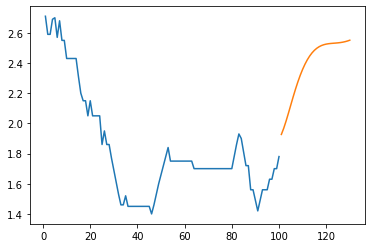

In [45]:
plt.plot(day_new,scaler.inverse_transform(df1[386:])) #numcheck
plt.plot(day_pred,scaler.inverse_transform(lst_output))

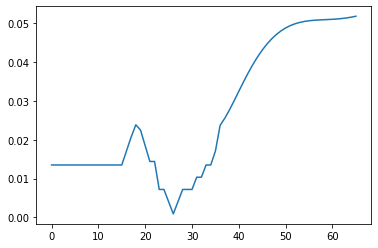

In [46]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[450:]) #numcheck

In [47]:
df3=scaler.inverse_transform(df3).tolist()

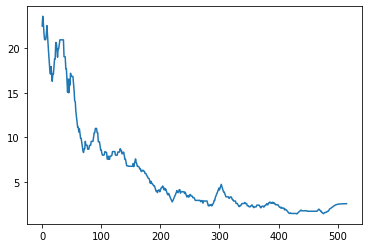

In [48]:
plt.plot(df3)

In [49]:
#this for making web app for visualisation but its not complete, in mean time we can try for it.
import datetime 
import pandas_datareader.data as web 
import dash 
import dash_core_components as dcc     
import dash_html_components as html 
from dash.dependencies import Input, Output

/home/prathmesh/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [50]:
app = dash.Dash() 
app.title = "Stock Visualisation"
app.layout = html.Div(children =[ 
    html.H1("Stock Visualisation Dashboard"), 
      
    html.H4("Please enter the stock name"), 
  
    dcc.Input(id ='input', value ='', type ='text'), 
  
    html.Div(id ='output-graph') 
]) 

In [51]:

def update_value(input_data): 
    # Reads stock prices from 1st January 2010 
    start = datetime.datetime(2010, 1, 1)  
    end = datetime.datetime.now() 
  
    # Read stock data from yahoo's finance API from start to end  
    df = web.DataReader(input_data, 'yahoo', start, end) 
        
    return dcc.Graph(id ="example", 
        figure ={ 
            'data':[{'x':df.index, 'y':df.Close, 'type':'line', 'name':input_data}, 
            ], 
            'layout':{ 
                'title':input_data 
            } 
        } 
    ) 
